In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from functools import reduce
import statistics
import random
from operator import add 

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

#3.1 Grayscale Image


array([[122, 182, 184, ..., 137, 136, 130],
       [129, 178, 188, ..., 128, 135, 146],
       [166, 170, 185, ..., 134, 131, 152],
       ...,
       [102, 138, 125, ...,  87,  82,  93],
       [ 92, 146, 127, ...,  78,  83,  90],
       [  2,   2,   4, ...,  29,  25,  32]], dtype=uint8)

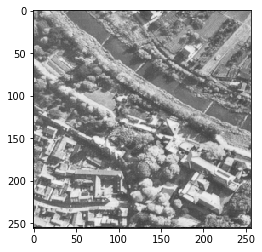

In [3]:
print(color.PURPLE + color.BOLD + '#3.1 Grayscale Image'+ color.END + color.END)
img1 = mpimg.imread('aerial.tiff')
imgplot_1 = plt.imshow(img1,cmap=plt.cm.gray,vmin=0,vmax=255)
img1

Identifying Threshold


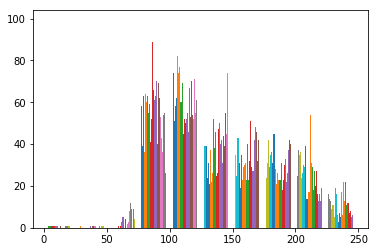

Threshold has been fixed at 125


In [3]:
print(color.PURPLE + color.BOLD + 'Identifying Threshold'+ color.END + color.END)
plt.hist(img1)
plt.show()
print(color.PURPLE + color.BOLD + 'Threshold has been fixed at 125'+ color.END + color.END)

In [4]:
def tobinary(arr):
    a = []
    for i in range(len(arr)):
        if(arr[i] > 125):
            a.append(1)
        else:
            a.append(0)
    return a

Binary Image


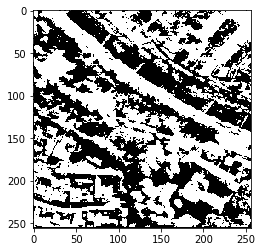

In [68]:
print(color.PURPLE + color.BOLD + 'Binary Image'+ color.END + color.END)
img2 = map(tobinary,img1)
img2 = list(img2)
imgplot_2 = plt.imshow(img2,cmap=plt.cm.gray)

In [6]:
def window(arr,i,j):
    rows,cols = np.shape(arr)
    a = i+1
    b = i-1
    c = j+1
    d = j-1
    if(a >= rows):
        a = b
    if(b < 0):
        b = a
    if(c >= cols):
        c = d
    if(d < 0):
        d = c
    return [arr[b][j],arr[i][d],arr[i][j],arr[i][c],arr[a][j]]

In [7]:
def flip(arr):
    a = []
    for bit in range(len(arr)):
        if(arr[bit] == 1):
            a.append(0)
        else:
            a.append(1)
    return a

Inverted Binary Image


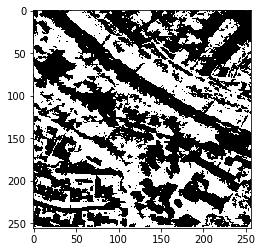

In [8]:
rows,cols = np.shape(img2)
dil_normal = np.zeros((rows,cols))
ero_normal = np.zeros((rows,cols))
med_normal = np.zeros((rows,cols))
dil_comp = np.zeros((rows,cols))
ero_comp = np.zeros((rows,cols))
med_comp = np.zeros((rows,cols))
img2_comp = list(map(flip,img2))

print(color.PURPLE + color.BOLD + 'Inverted Binary Image'+ color.END + color.END)
imgcplot_2 = plt.imshow(img2_comp,cmap=plt.cm.gray)

In [22]:
for i in range(rows):
    for j in range(cols):
        #print(i,j)
        temp1 = window(img2,i,j)
        temp2 = window(img2_comp,i,j)
        dil_normal[i][j] = reduce(lambda x, y: x | y, temp1)
        ero_normal[i][j] = reduce(lambda x, y: x & y, temp1)
        med_normal[i][j] = statistics.mode(temp1)
        dil_comp[i][j] = reduce(lambda x, y: x | y, temp2)
        ero_comp[i][j] = reduce(lambda x, y: x & y, temp2)
        med_comp[i][j] = statistics.mode(temp2)

In [59]:
#dn_plot = plt.imshow(dil_normal,cmap=plt.cm.gray)

In [60]:
#ec_plot = plt.imshow(ero_comp,cmap=plt.cm.gray)

DILATE on Normal Image + ERODE on Inverted Image


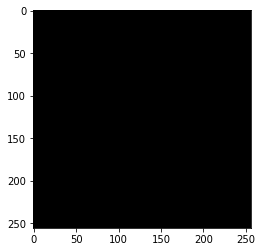

In [67]:
print(color.PURPLE + color.BOLD + 'DILATE on Normal Image + ERODE on Inverted Image'+ color.END + color.END)
plt1 = list(map(add, ero_comp, dil_normal))
plt.imshow(plt1,cmap=plt.cm.gray)
plt.show()

In [61]:
#en_plot = plt.imshow(ero_normal,cmap=plt.cm.gray)

In [62]:
#dc_plot = plt.imshow(dil_comp,cmap=plt.cm.gray)

DILATE on Inverted Image + ERODE on Normal Image


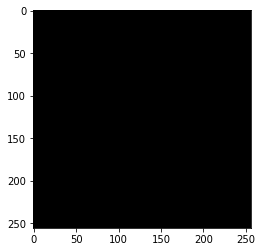

In [66]:
print(color.PURPLE + color.BOLD + 'DILATE on Inverted Image + ERODE on Normal Image'+ color.END + color.END)
plt2 = list(map(add, ero_normal, dil_comp))
plt.imshow(plt2,cmap=plt.cm.gray)
plt.show()

In [63]:
#mn_plot = plt.imshow(med_normal,cmap=plt.cm.gray)

In [64]:
#mc_plot = plt.imshow(med_comp,cmap=plt.cm.gray)

MEDIAN on Normal Image + MEDIAN on Inverted Image


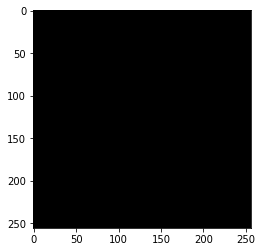

In [65]:
print(color.PURPLE + color.BOLD + 'MEDIAN on Normal Image + MEDIAN on Inverted Image'+ color.END + color.END)
plt3 = list(map(add, med_comp, med_normal))
plt.imshow(plt3,cmap=plt.cm.gray)
plt.show()

#3.2
Grayscale NASA Image


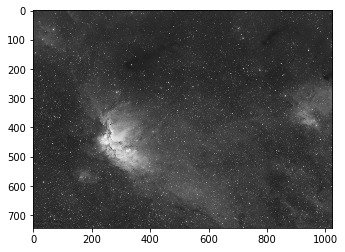

In [69]:
print(color.PURPLE + color.BOLD + '#3.2'+ color.END + color.END)
print(color.PURPLE + color.BOLD + 'Grayscale NASA Image'+ color.END + color.END)
andro = mpimg.imread('neb_gray.jpg')
plt.imshow(andro,cmap=plt.cm.gray)
plt.show()
andro = andro[:,:,0]

Histogram of Original Image


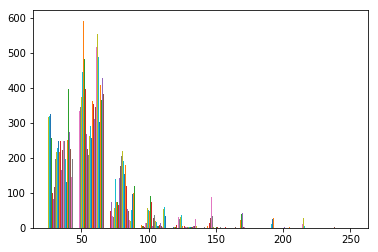

In [79]:
print(color.PURPLE + color.BOLD + 'Histogram of Original Image'+ color.END + color.END)
plt.hist(andro)
plt.show()

In [42]:
def scaling(arr):
    a = []
    scale = 0.5
    for i in range(len(arr)):
        t = arr[i]*scale
        if(t > 255):
            t = 255
        a.append(t)
    return a

Histogram of Scaled Image


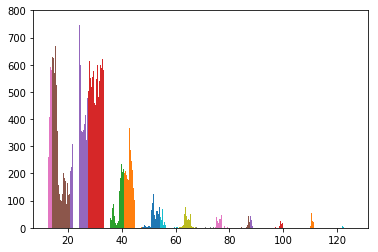

In [71]:
print(color.PURPLE + color.BOLD + 'Histogram of Scaled Image'+ color.END + color.END)
andro_scaled = list(map(scaling,andro))
plt.hist(andro_scaled)
plt.show()

In [45]:
def offset(arr):
    a = []
    off = 30
    for i in range(len(arr)):
        t = arr[i]+off
        if(t > 255):
            t = 255
        if(t < 0):
            t = 0
        a.append(t)
    return a

Histogram of offseted image


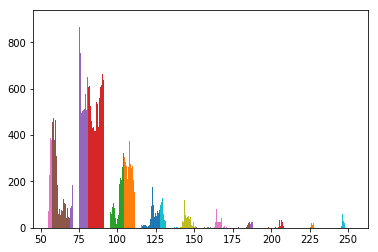

In [74]:
print(color.PURPLE + color.BOLD + 'Histogram of offseted Image'+ color.END + color.END)
andro_off = list(map(offset,andro))
plt.hist(andro_off)
plt.show()

In [73]:
smallest = np.amin(andro)
biggest = np.amax(andro)
print(color.PURPLE + color.BOLD + 'Smallest Pixel Value (before FSCS):'+ color.END + color.END,smallest)
print(color.PURPLE + color.BOLD + 'Largest Pixel Value (before FSCS):'+ color.END + color.END,biggest)

Smallest Pixel Value: 23
Largest Pixel Value: 254


In [54]:
def fscs(arr):
    a = []
    P = 255/(254-23)
    L = -(23)*(255/(254-23))
    for i in range(len(arr)):
        t = (arr[i]*P)+L
        if(t > 255):
            t = 255
        if(t < 0):
            t = 0
        a.append(t)
    return a

Histogram of Full Scale Contrast Stretched Image


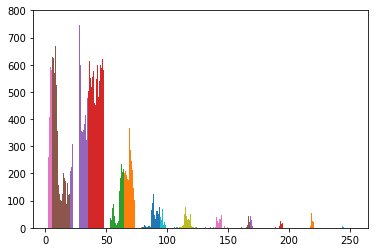

In [75]:
print(color.PURPLE + color.BOLD + 'Histogram of Full Scale Contrast Stretched Image'+ color.END + color.END)
andro_fscs = list(map(fscs,andro))
plt.hist(andro_fscs)
plt.show()

In [102]:
print(color.PURPLE + color.BOLD + 'Smallest Pixel Value (after FSCS):'+ color.END + color.END,np.amin(andro_fscs))
print(color.PURPLE + color.BOLD + 'Largest Pixel Value (after FSCS):'+ color.END + color.END,np.amax(andro_fscs))

Smallest Pixel Value (after FSCS): 0.0
Largest Pixel Value (after FSCS): 255.0


In [56]:
def logcomp(arr):
    a = []
    for i in range(len(arr)):
        t = np.log((arr[i])+1)
        if(t > 255):
            t = 255
        if(t < 0):
            t = 0
        a.append(t)
    return a

Histogram of Log Magnitude Compressed Image


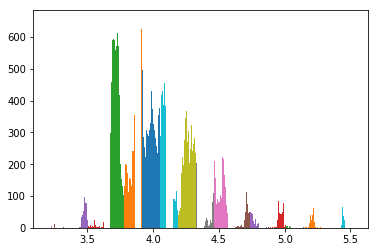

In [76]:
print(color.PURPLE + color.BOLD + 'Histogram of Log Magnitude Compressed Image'+ color.END + color.END)
andro_log = list(map(logcomp,andro))
plt.hist(andro_log)
plt.show()

Histogram of Image after flattening


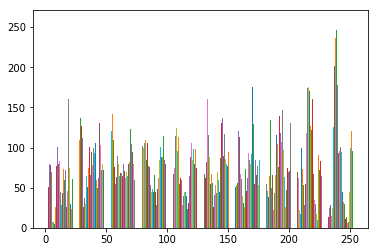

In [101]:
andro_hist = andro[:]
bins = np.arange(256)
andro_hist = andro_hist.flatten()
r,c = np.shape(andro)
counts, bin_edges = np.histogram(andro_hist, bins=bins)
norm_counts = counts/(r*c)
cum_counts = np.cumsum(norm_counts)
andro_flatten = andro[:]
andro_flat = np.zeros((r,c))
for i in range(r):
    for j in range(c):
        andro_flat[i][j] = cum_counts[andro_flatten[i][j]]
P_flat = 255/1
andro_flat = andro_flat*P_flat
print(color.PURPLE + color.BOLD + 'Histogram of Image after flattening'+ color.END + color.END)
plt.hist(andro_flat)
plt.show()

#3.3 Nearest Neighbor
Resolution after Zooming: (1116, 1536)
Initial Resolution: (744, 1024)


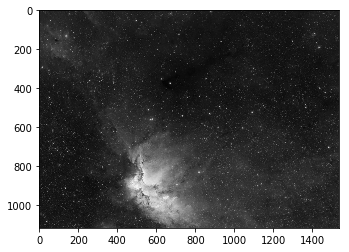

In [126]:
print(color.PURPLE + color.BOLD + '#3.3 Nearest Neighbor'+ color.END + color.END)
zoomed = np.zeros((int(r*3/2),int(c*3/2)))
checked = np.zeros((int(r*3/2),int(c*3/2)))
zr,zc = np.shape(zoomed)
nr = 1
nc = 1
for i in range(zr):
    if(i == nr + 1):
        nr = nr + 4
    nc = 1
    for j in range(zc):
        if(i != nr and j != nc):
            zoomed[i][j] = andro[i//2][j//2]
            checked[i][j] = 1
        else:
            nc += 4
#print(zoomed)
for i in range(zr):
    for j in range(zc):
        vals = []
        #print('i:',i)
        #print('j:',j)
        if(checked[i][j] != 1):
            if(i-1 >= 0 and checked[i-1][j] == 1):
                vals.append(zoomed[i-1][j])
            if(i+1 < zr and checked[i+1][j] == 1):
                vals.append(zoomed[i+1][j])
            if(j-1 >= 0 and checked[i][j-1] == 1):
                vals.append(zoomed[i][j-1])
            if(j+1 < zc and checked[i][j+1] == 1):
                vals.append(zoomed[i][j+1])
            #print(vals)
            rand = random.choice(vals)
            zoomed[i][j] = rand
            checked[i][j] = 1
print(color.PURPLE + color.BOLD + 'Resolution after Zooming:'+ color.END + color.END,np.shape(zoomed))            
print(color.PURPLE + color.BOLD + 'Initial Resolution:'+ color.END + color.END,np.shape(andro))            
plt.imshow(zoomed,cmap=plt.cm.gray)
plt.show()